In [29]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests

In [151]:
home_team = 'LSU'
away_team = 'Clemson'

In [12]:
response = requests.get("https://api.collegefootballdata.com/teams/fbs")
teams = pd.read_json(response.text)
teams = teams[['school', 'color']].set_index('school')
teams.head()

,color
school,
Air Force,#004a7b
Akron,#00285e
Alabama,#690014
Appalachian State,#000000
Arizona,#002449


In [2]:
response = requests.get(
    "https://api.collegefootballdata.com/stats/season/advanced",
    params={"year": 2019}
)

data = pd.io.json.json_normalize(response.json())
data.head()

,season,team,conference,offense.plays,offense.drives,offense.ppa,offense.successRate,offense.explosiveness,offense.powerSuccess,offense.stuffRate,...,defense.passingDowns.successRate,defense.passingDowns.explosiveness,defense.rushingPlays.rate,defense.rushingPlays.ppa,defense.rushingPlays.successRate,defense.rushingPlays.explosiveness,defense.passingPlays.rate,defense.passingPlays.ppa,defense.passingPlays.successRate,defense.passingPlays.explosiveness
0,2019,Air Force,Mountain West,863,132,0.313866,0.520278,1.068555,0.868687,0.128988,...,0.245968,1.947974,0.461330,-0.004430,0.355882,0.855558,0.527815,0.197312,0.413882,1.557374
1,2019,Akron,Mid-American,712,149,-0.082674,0.297753,1.293997,0.612903,0.267176,...,0.356223,1.637167,0.627178,0.163950,0.440741,0.974308,0.357724,0.308928,0.506494,1.363636
2,2019,Alabama,SEC,829,150,0.408187,0.516285,1.387503,0.777778,0.195599,...,0.281787,1.311242,0.485549,0.017560,0.395238,0.897145,0.492486,0.012734,0.349765,1.557081
3,2019,Appalachian State,Sun Belt,951,174,0.255155,0.424816,1.363805,0.792453,0.176471,...,0.295977,2.046503,0.463862,0.023384,0.330233,1.173336,0.522114,0.106575,0.349174,1.743747
4,2019,Arizona,Pac-12,864,149,0.217356,0.430556,1.303222,0.755102,0.166259,...,0.369478,1.878061,0.485812,0.184999,0.514019,0.891179,0.493757,0.333261,0.441379,1.619869


In [152]:
stats = data.query("team == '{0}' | team == '{1}'".format(home_team, away_team))
stats = stats.set_index('team')
stats = stats.join(teams)
stats.head()

,season,conference,offense.plays,offense.drives,offense.ppa,offense.successRate,offense.explosiveness,offense.powerSuccess,offense.stuffRate,offense.lineYards,...,defense.passingDowns.explosiveness,defense.rushingPlays.rate,defense.rushingPlays.ppa,defense.rushingPlays.successRate,defense.rushingPlays.explosiveness,defense.passingPlays.rate,defense.passingPlays.ppa,defense.passingPlays.successRate,defense.passingPlays.explosiveness,color
team,,,,,,,,,,,,,,,,,,,,,
Clemson,2019,ACC,991,186,0.370669,0.500505,1.324822,0.826087,0.141732,3.615748,...,1.675952,0.510808,-0.049469,0.331849,0.897176,0.476678,-0.017502,0.305489,1.539765,#F66733
LSU,2019,SEC,995,182,0.411835,0.554774,1.243328,0.727273,0.188636,3.226364,...,1.804470,0.439914,0.000587,0.351220,0.958049,0.547210,0.149602,0.337255,1.786506,#22005c


In [153]:
team1 = stats.loc[home_team]
team2 = stats.loc[away_team]
team2

season                                     2019
conference                                  ACC
offense.plays                               991
offense.drives                              186
offense.ppa                            0.370669
                                        ...    
defense.passingPlays.rate              0.476678
defense.passingPlays.ppa             -0.0175016
defense.passingPlays.successRate       0.305489
defense.passingPlays.explosiveness      1.53976
color                                   #F66733
Name: Clemson, Length: 70, dtype: object

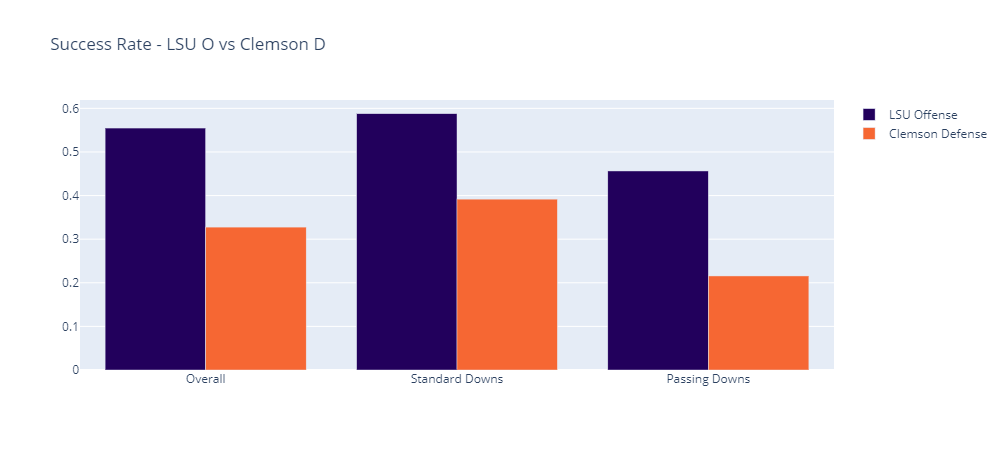

In [154]:
categories=['Overall', 'Standard Downs', 'Passing Downs']

fig = go.Figure(data=[
    go.Bar(name='{0} Offense'.format(home_team), x=categories, y=[team1['offense.successRate'], team1['offense.standardDowns.successRate'], team1['offense.passingDowns.successRate']], marker_color=team1.color),
    go.Bar(name='{0} Defense'.format(away_team), x=categories, y=[team2['defense.successRate'], team2['defense.standardDowns.successRate'], team2['defense.passingDowns.successRate']], marker_color=team2.color)
])
# Change the bar mode
fig.update_layout(barmode='group', title='Success Rate - {0} O vs {1} D'.format(home_team, away_team))
fig.show()

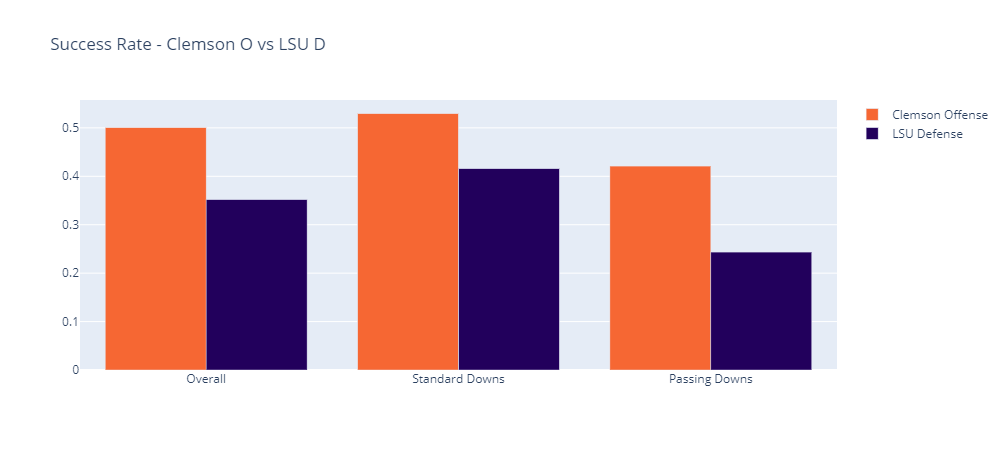

In [156]:
categories=['Overall', 'Standard Downs', 'Passing Downs']

fig = go.Figure(data=[
    go.Bar(name='{0} Offense'.format(away_team), x=categories, y=[team2['offense.successRate'], team2['offense.standardDowns.successRate'], team2['offense.passingDowns.successRate']], marker_color=team2.color),
    go.Bar(name='{0} Defense'.format(home_team), x=categories, y=[team1['defense.successRate'], team1['defense.standardDowns.successRate'], team1['defense.passingDowns.successRate']], marker_color = team1.color)
])
# Change the bar mode
fig.update_layout(barmode='group', title='Success Rate - {0} O vs {1} D'.format(away_team, home_team))
fig.show()

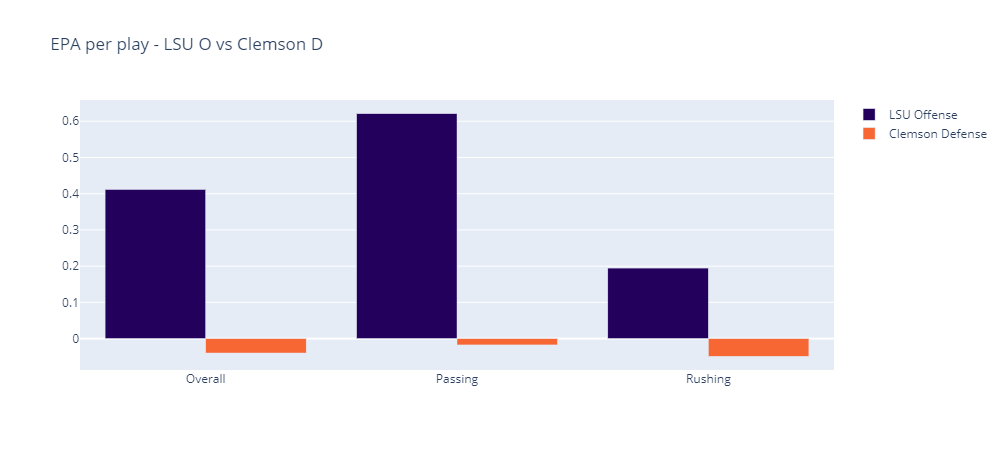

In [157]:
categories=['Overall', 'Passing', 'Rushing']

fig = go.Figure(data=[
    go.Bar(name='{0} Offense'.format(home_team), x=categories, y=[team1['offense.ppa'], team1['offense.passingPlays.ppa'], team1['offense.rushingPlays.ppa']], marker_color=team1.color),
    go.Bar(name='{0} Defense'.format(away_team), x=categories, y=[team2['defense.ppa'], team2['defense.passingPlays.ppa'], team2['defense.rushingPlays.ppa']], marker_color=team2.color)
])
# Change the bar mode
fig.update_layout(barmode='group', title='EPA per play - {0} O vs {1} D'.format(home_team, away_team))
fig.show()

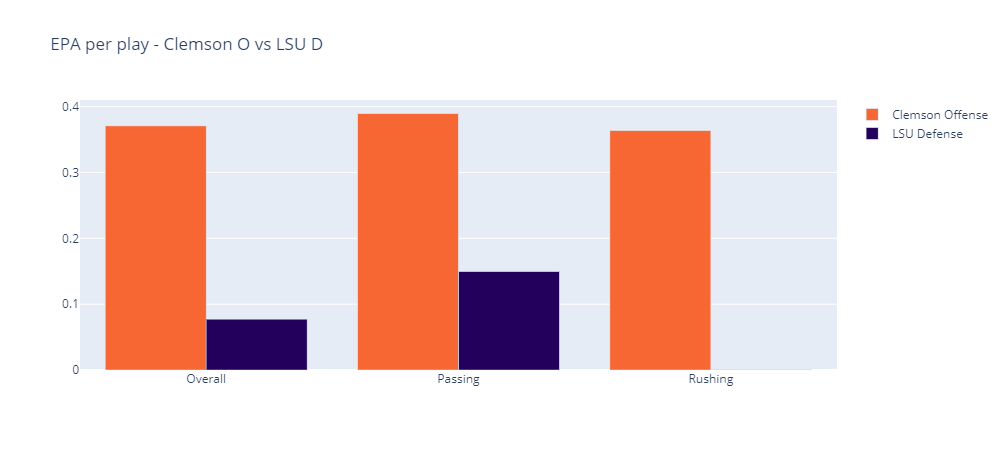

In [158]:
categories=['Overall', 'Passing', 'Rushing']

fig = go.Figure(data=[
    go.Bar(name='{0} Offense'.format(away_team), x=categories, y=[team2['offense.ppa'], team2['offense.passingPlays.ppa'], team2['offense.rushingPlays.ppa']], marker_color=team2.color),
    go.Bar(name='{0} Defense'.format(home_team), x=categories, y=[team1['defense.ppa'], team1['defense.passingPlays.ppa'], team1['defense.rushingPlays.ppa']], marker_color=team1.color)
])
# Change the bar mode
fig.update_layout(barmode='group', title='EPA per play - {0} O vs {1} D'.format(away_team, home_team))
fig.show()

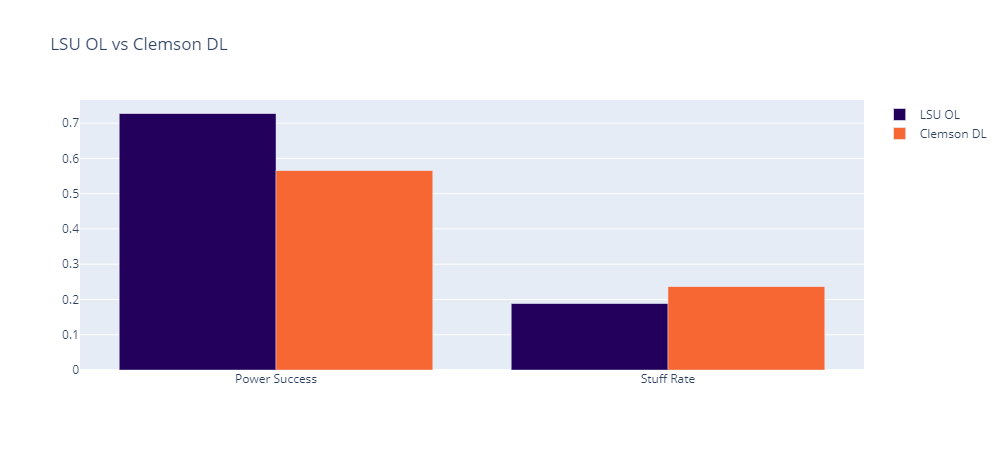

In [159]:
categories=['Power Success', 'Stuff Rate']

fig = go.Figure(data=[
    go.Bar(name='{0} OL'.format(home_team), x=categories, y=[team1['offense.powerSuccess'], team1['offense.stuffRate']], marker_color=team1.color),
    go.Bar(name='{0} DL'.format(away_team), x=categories, y=[team2['defense.powerSuccess'], team2['defense.stuffRate']], marker_color=team2.color)
])
# Change the bar mode
fig.update_layout(barmode='group', title='{0} OL vs {1} DL'.format(home_team, away_team))
fig.show()

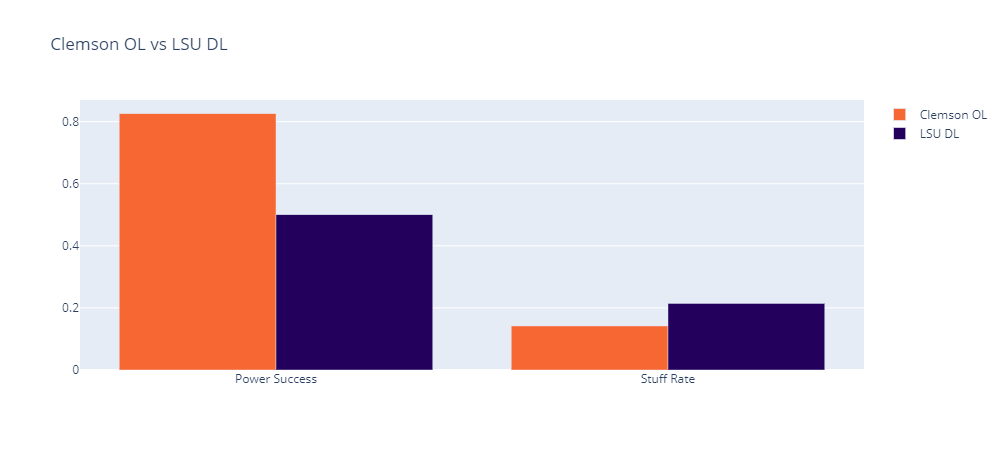

In [160]:
categories=['Power Success', 'Stuff Rate']

fig = go.Figure(data=[
    go.Bar(name='{0} OL'.format(away_team), x=categories, y=[team2['offense.powerSuccess'], team2['offense.stuffRate']], marker_color=team2.color),
    go.Bar(name='{0} DL'.format(home_team), x=categories, y=[team1['defense.powerSuccess'], team1['defense.stuffRate']], marker_color=team1.color)
])
# Change the bar mode
fig.update_layout(barmode='group', title='{0} OL vs {1} DL'.format(away_team, home_team))
fig.show()

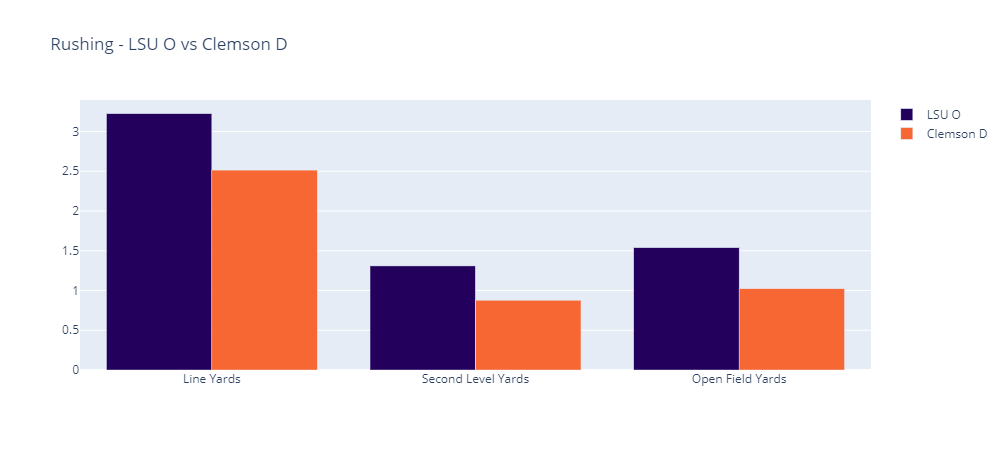

In [161]:
categories=['Line Yards', 'Second Level Yards', 'Open Field Yards']

fig = go.Figure(data=[
    go.Bar(name='{0} O'.format(home_team), x=categories, y=[team1['offense.lineYards'], team1['offense.secondLevelYards'], team1['offense.openFieldYards']], marker_color=team1.color),
    go.Bar(name='{0} D'.format(away_team), x=categories, y=[team2['defense.lineYards'], team2['defense.secondLevelYards'], team2['defense.openFieldYards']], marker_color=team2.color)
])
# Change the bar mode
fig.update_layout(barmode='group', title='Rushing - {0} O vs {1} D'.format(home_team, away_team))
fig.show()

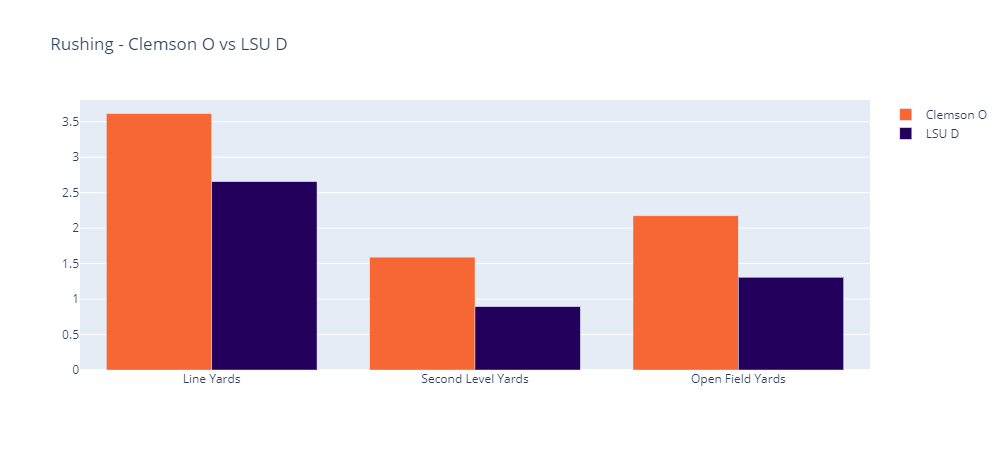

In [162]:
categories=['Line Yards', 'Second Level Yards', 'Open Field Yards']

fig = go.Figure(data=[
    go.Bar(name='{0} O'.format(away_team), x=categories, y=[team2['offense.lineYards'], team2['offense.secondLevelYards'], team2['offense.openFieldYards']], marker_color=clemson.color),
    go.Bar(name='{0} D'.format(home_team), x=categories, y=[team1['defense.lineYards'], team1['defense.secondLevelYards'], team1['defense.openFieldYards']], marker_color=team1.color)
])
# Change the bar mode
fig.update_layout(barmode='group', title='Rushing - {0} O vs {1} D'.format(away_team, home_team))
fig.show()

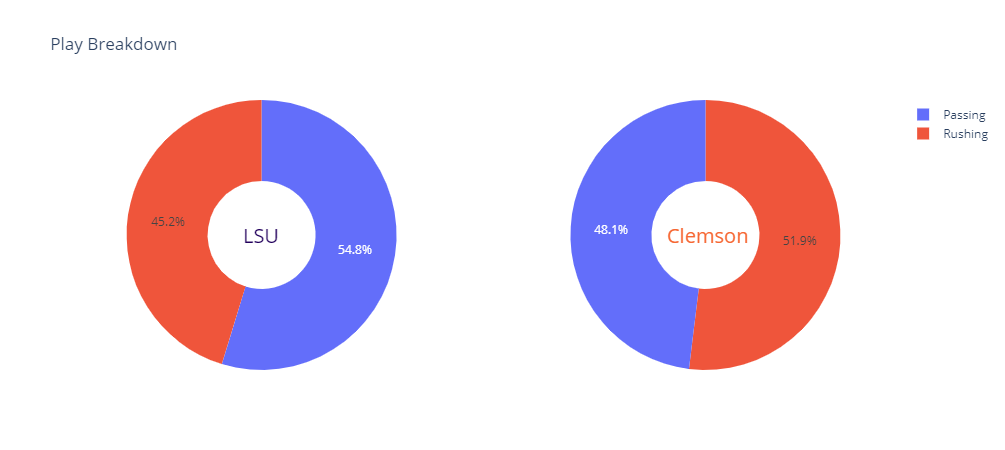

In [163]:
labels = ["Passing","Rushing"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[team1['offense.passingPlays.rate'], team1['offense.rushingPlays.rate']], name=home_team),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[team2['offense.passingPlays.rate'], team2['offense.rushingPlays.rate']], name=away_team),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Play Breakdown",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text=home_team, x=0.2, y=0.5, font_size=20, showarrow=False, font=dict(color=team1.color)),
                 dict(text=away_team, x=0.83, y=0.5, font_size=20, showarrow=False, font=dict(color=team2.color))])
fig.show()

In [51]:
response = requests.get(
    "https://api.collegefootballdata.com/player/usage",
    params={"year": 2019, "exludeGarbageTime": True}
)

usage = pd.io.json.json_normalize(response.json())
usage.head()

,season,id,name,position,team,conference,usage.overall,usage.pass,usage.rush,usage.firstDown,usage.secondDown,usage.thirdDown,usage.standardDowns,usage.passingDowns
0,2019,4055171,Anthony Gordon,QB,Washington State,Pac-12,0.7826,0.9595,0.1784,0.7703,0.814,0.852,0.776,0.801
1,2019,3675812,Bryce Perkins,QB,Virginia,ACC,0.7340,0.9576,0.4617,0.7021,0.757,0.851,0.702,0.803
2,2019,4374350,Asher O'Hara,QB,Middle Tennessee,Conference USA,0.6724,0.9142,0.4469,0.6092,0.713,0.814,0.630,0.767
3,2019,4241635,Josh Adkins,QB,New Mexico State,FBS Independents,0.6449,0.9849,0.1982,0.6000,0.628,0.795,0.584,0.754
4,2019,4241820,Sam Ehlinger,QB,Texas,Big 12,0.6439,0.9695,0.2900,0.5771,0.627,0.859,0.585,0.773


In [54]:
usage = usage.query("team == '{0}' | team == '{1}'",format(home_team, away_team))
usage = usage.set_index('id')
usage.head()

,season,name,position,team,conference,usage.overall,usage.pass,usage.rush,usage.firstDown,usage.secondDown,usage.thirdDown,usage.standardDowns,usage.passingDowns
id,,,,,,,,,,,,,
3915511,2019,Joe Burrow,QB,LSU,SEC,0.5658,0.9231,0.1614,0.5830,0.532,0.652,0.534,0.659
4360310,2019,Trevor Lawrence,QB,Clemson,ACC,0.4490,0.7872,0.1476,0.3903,0.480,0.593,0.392,0.605
4242214,2019,Clyde Edwards-Helaire,RB,LSU,SEC,0.2442,0.0976,0.4341,0.2753,0.253,0.177,0.281,0.135
4239996,2019,Travis Etienne,RB,Clemson,ACC,0.2240,0.0745,0.3681,0.2679,0.229,0.108,0.255,0.139
4262921,2019,Justin Jefferson,WR,LSU,SEC,0.1186,0.2214,0.0000,0.1154,0.127,0.134,0.106,0.155


In [56]:
response = requests.get(
    "https://api.collegefootballdata.com/play/stats",
    params={"year": 2019, "team": home_team}
)

team1_plays = pd.read_json(response.text)
team1_plays.head()

,gameId,season,week,opponent,teamScore,opponentScore,driveId,playId,period,secondsRemaining,yardsToGoal,down,distance,athleteId,athleteName,statType,stat
0,401110833,2019,9,Auburn,23,20,40111083330,401110833104984704,4,52,62,1,20,4242214,Clyde Edwards-Helaire,Rush,6
1,401110833,2019,9,Auburn,23,20,40111083330,401110833104989696,4,2,56,2,14,4242214,Clyde Edwards-Helaire,Rush,0
2,401110833,2019,9,Auburn,23,13,40111083328,401110833104966080,4,38,96,2,10,4242214,Clyde Edwards-Helaire,Rush,1
3,401110833,2019,9,Auburn,23,13,40111083328,401110833104957824,4,21,96,1,10,4242214,Clyde Edwards-Helaire,Rush,0
4,401110833,2019,9,Auburn,23,13,40111083328,401110833104966528,4,34,95,3,9,3915511,Joe Burrow,Rush,3


In [57]:
response = requests.get(
    "https://api.collegefootballdata.com/play/stats",
    params={"year": 2019, "team": away_team}
)

team2_plays = pd.read_json(response.text)

plays = pd.concat([
    team1_plays,
    team2_plays
])

plays.head()

,gameId,season,week,opponent,teamScore,opponentScore,driveId,playId,period,secondsRemaining,yardsToGoal,down,distance,athleteId,athleteName,statType,stat
0,401110833,2019,9,Auburn,23,20,40111083330,401110833104984704,4,52,62,1,20,4242214,Clyde Edwards-Helaire,Rush,6
1,401110833,2019,9,Auburn,23,20,40111083330,401110833104989696,4,2,56,2,14,4242214,Clyde Edwards-Helaire,Rush,0
2,401110833,2019,9,Auburn,23,13,40111083328,401110833104966080,4,38,96,2,10,4242214,Clyde Edwards-Helaire,Rush,1
3,401110833,2019,9,Auburn,23,13,40111083328,401110833104957824,4,21,96,1,10,4242214,Clyde Edwards-Helaire,Rush,0
4,401110833,2019,9,Auburn,23,13,40111083328,401110833104966528,4,34,95,3,9,3915511,Joe Burrow,Rush,3


In [58]:
plays["margin"] = abs(plays['teamScore'] - plays['opponentScore'])
plays.head()

,gameId,season,week,opponent,teamScore,opponentScore,driveId,playId,period,secondsRemaining,yardsToGoal,down,distance,athleteId,athleteName,statType,stat,margin
0,401110833,2019,9,Auburn,23,20,40111083330,401110833104984704,4,52,62,1,20,4242214,Clyde Edwards-Helaire,Rush,6,3
1,401110833,2019,9,Auburn,23,20,40111083330,401110833104989696,4,2,56,2,14,4242214,Clyde Edwards-Helaire,Rush,0,3
2,401110833,2019,9,Auburn,23,13,40111083328,401110833104966080,4,38,96,2,10,4242214,Clyde Edwards-Helaire,Rush,1,10
3,401110833,2019,9,Auburn,23,13,40111083328,401110833104957824,4,21,96,1,10,4242214,Clyde Edwards-Helaire,Rush,0,10
4,401110833,2019,9,Auburn,23,13,40111083328,401110833104966528,4,34,95,3,9,3915511,Joe Burrow,Rush,3,10


In [60]:
plays = plays.query("(period == 1) | (period == 2 & margin < 39) | (period == 3 & margin < 29) | (period == 4 & margin < 23) | (period > 4)")

In [62]:
pd.unique(plays['statType'])

array(['Rush', 'Target', 'Incompletion', 'Sack', 'Reception',
       'Completion', 'Touchdown', 'Pass Breakup', 'Interception Thrown',
       'Interception', 'Sack Taken', 'Fumble', 'Fumble Recovered',
       'Fumble Forced'], dtype=object)

In [64]:
plays = plays.query("(statType == 'Rush') | (statType == 'Target') | (statType == 'Incompletion') | (statType == 'Sack Taken') | (statType == 'Reception') | (statType == 'Completion') | (statType == 'Interception Thrown')")

In [65]:
plays = plays[['playId', 'statType', 'athleteName', 'athleteId']]

In [66]:
response = requests.get(
    "https://api.collegefootballdata.com/plays",
    params={"year": 2019, "offense": home_team}
)

team1_plays = pd.read_json(response.text)

response = requests.get(
    "https://api.collegefootballdata.com/plays",
    params={"year": 2019, "offense": away_team}
)

team2_plays = pd.read_json(response.text)

all_plays = pd.concat([
    team1_plays,
    team2_plays
])

all_plays.head()

,id,offense,offense_conference,defense,defense_conference,home,away,offense_score,defense_score,drive_id,period,clock,yard_line,down,distance,yards_gained,play_type,play_text,ppa
0,401110725101857408,LSU,SEC,Georgia Southern,Sun Belt,LSU,Georgia Southern,0,0,4011107251,1,"{'minutes': 14, 'seconds': 25}",25,2,10,7,Rush,Clyde Edwards-Helaire run for 7 yds to the LSU 32,0.313816
1,401110725101869184,LSU,SEC,Georgia Southern,Sun Belt,LSU,Georgia Southern,0,0,4011107251,1,"{'minutes': 13, 'seconds': 7}",97,1,0,-10,Penalty,"LSU Penalty, Offensive Holding (-10 Yards) to ...",NaN
2,401110725101876288,LSU,SEC,Georgia Southern,Sun Belt,LSU,Georgia Southern,7,0,4011107251,1,"{'minutes': 12, 'seconds': 36}",87,1,13,13,Passing Touchdown,Joe Burrow pass complete to Ja'Marr Chase for ...,2.720756
3,401110725101867520,LSU,SEC,Georgia Southern,Sun Belt,LSU,Georgia Southern,0,0,4011107251,1,"{'minutes': 13, 'seconds': 24}",53,1,10,44,Pass Reception,Joe Burrow pass complete to Justin Jefferson f...,2.148751
4,401110725101864512,LSU,SEC,Georgia Southern,Sun Belt,LSU,Georgia Southern,0,0,4011107251,1,"{'minutes': 13, 'seconds': 54}",36,1,10,17,Pass Reception,Joe Burrow pass complete to Thaddeus Moss for ...,1.533990


In [70]:
all_plays.dropna(subset=["ppa"], inplace=True)

In [71]:
plays = plays.merge(all_plays[['id', 'ppa']], left_on='playId', right_on='id')
plays.head()

,playId,statType,athleteName,athleteId,id,ppa
0,401110833104984704,Rush,Clyde Edwards-Helaire,4242214,401110833104984704,0.218460
1,401110833104989696,Rush,Clyde Edwards-Helaire,4242214,401110833104989696,-0.695718
2,401110833104966080,Rush,Clyde Edwards-Helaire,4242214,401110833104966080,-0.097336
3,401110833104957824,Rush,Clyde Edwards-Helaire,4242214,401110833104957824,-0.270587
4,401110833104966528,Rush,Joe Burrow,3915511,401110833104966528,-0.024653


In [73]:
plays['type'] = np.where(plays['statType'] == 'Rush', 'Rush', 'Pass')
plays.head()

,playId,statType,athleteName,athleteId,id,ppa,type
0,401110833104984704,Rush,Clyde Edwards-Helaire,4242214,401110833104984704,0.218460,Rush
1,401110833104989696,Rush,Clyde Edwards-Helaire,4242214,401110833104989696,-0.695718,Rush
2,401110833104966080,Rush,Clyde Edwards-Helaire,4242214,401110833104966080,-0.097336,Rush
3,401110833104957824,Rush,Clyde Edwards-Helaire,4242214,401110833104957824,-0.270587,Rush
4,401110833104966528,Rush,Joe Burrow,3915511,401110833104966528,-0.024653,Rush


In [75]:
total_ppa = plays.groupby('athleteId').ppa.mean()
total_ppa.head()

athleteId
3843469    1.251068
3843640   -0.176929
3915511    0.650802
4035426    1.157674
4035464    0.756977
Name: ppa, dtype: float64

In [78]:
total_ppa = total_ppa.reset_index()
total_ppa.head()

,index,athleteId,ppa
0,0,3843469,1.251068
1,1,3843640,-0.176929
2,2,3915511,0.650802
3,3,4035426,1.157674
4,4,4035464,0.756977


In [79]:
rest_ppa = plays.groupby(['athleteId', 'type']).ppa.mean().reset_index()
rest_ppa.head()

,athleteId,type,ppa
0,3843469,Pass,1.251068
1,3843640,Pass,-0.199495
2,3843640,Rush,-0.165647
3,3915511,Pass,0.680023
4,3915511,Rush,0.429559


In [85]:
all_ppa = total_ppa.merge(rest_ppa.query("type == 'Rush'")[['athleteId', 'ppa']], left_on='athleteId', right_on='athleteId', suffixes=('', '_rush'), how='left')
all_ppa.head()

,index,athleteId,ppa,ppa_rush
0,0,3843469,1.251068,NaN
1,1,3843640,-0.176929,-0.165647
2,2,3915511,0.650802,0.429559
3,3,4035426,1.157674,NaN
4,4,4035464,0.756977,NaN


In [86]:
all_ppa = all_ppa.merge(rest_ppa.query("type == 'Pass'")[['athleteId', 'ppa']], left_on='athleteId', right_on='athleteId', suffixes=('', '_pass'), how='left')
all_ppa.head()

,index,athleteId,ppa,ppa_rush,ppa_pass
0,0,3843469,1.251068,NaN,1.251068
1,1,3843640,-0.176929,-0.165647,-0.199495
2,2,3915511,0.650802,0.429559,0.680023
3,3,4035426,1.157674,NaN,1.157674
4,4,4035464,0.756977,NaN,0.756977


In [89]:
all_ppa.fillna(value=0, inplace=True)
all_ppa.head()

,index,athleteId,ppa,ppa_rush,ppa_pass
0,0,3843469,1.251068,0.000000,1.251068
1,1,3843640,-0.176929,-0.165647,-0.199495
2,2,3915511,0.650802,0.429559,0.680023
3,3,4035426,1.157674,0.000000,1.157674
4,4,4035464,0.756977,0.000000,0.756977


In [108]:
all_ppa = all_ppa.set_index("id")

In [109]:
all_ppa.head()

,ppa,ppa_rush,ppa_pass
id,,,
3843469,1.251068,0.000000,1.251068
3843640,-0.176929,-0.165647,-0.199495
3915511,0.650802,0.429559,0.680023
4035426,1.157674,0.000000,1.157674
4035464,0.756977,0.000000,0.756977


In [112]:
usage.head()

,season,name,position,team,conference,usage.overall,usage.pass,usage.rush,usage.firstDown,usage.secondDown,usage.thirdDown,usage.standardDowns,usage.passingDowns
id,,,,,,,,,,,,,
3915511,2019,Joe Burrow,QB,LSU,SEC,0.5658,0.9231,0.1614,0.5830,0.532,0.652,0.534,0.659
4360310,2019,Trevor Lawrence,QB,Clemson,ACC,0.4490,0.7872,0.1476,0.3903,0.480,0.593,0.392,0.605
4242214,2019,Clyde Edwards-Helaire,RB,LSU,SEC,0.2442,0.0976,0.4341,0.2753,0.253,0.177,0.281,0.135
4239996,2019,Travis Etienne,RB,Clemson,ACC,0.2240,0.0745,0.3681,0.2679,0.229,0.108,0.255,0.139
4262921,2019,Justin Jefferson,WR,LSU,SEC,0.1186,0.2214,0.0000,0.1154,0.127,0.134,0.106,0.155


In [120]:
#usage = usage.reset_index().set_index('id')
usage.index

Index(['3915511', '4360310', '4242214', '4239996', '4262921', '4360314',
       '4362628', '4239994', '4360306', '4426475', '4239993', '4362630',
       '4242210', '4036189', '4426333', '4426409', '4362632', '4239992',
       '4427111', '4426426', '4035464', '4046826', '4426430', '3843469',
       '4035465', '3843640', '4242231', '4239999', '4035469', '4426343',
       '4035426', '4035466', '4362650', '4360312', '4430518', '4426553',
       '4240003', '4035449', '4242209', '4426481', '4242212', '4360321',
       '4249919', '4240009', '3917215', '4391365', '4568018', '4035482',
       '4426407', '4427779'],
      dtype='object', name='id')

In [121]:
usage.index = usage.index.astype('int64')

In [122]:
players = usage.join(all_ppa)
players.head()

,season,name,position,team,conference,usage.overall,usage.pass,usage.rush,usage.firstDown,usage.secondDown,usage.thirdDown,usage.standardDowns,usage.passingDowns,ppa,ppa_rush,ppa_pass
id,,,,,,,,,,,,,,,,
3915511,2019,Joe Burrow,QB,LSU,SEC,0.5658,0.9231,0.1614,0.5830,0.532,0.652,0.534,0.659,0.650802,0.429559,0.680023
4360310,2019,Trevor Lawrence,QB,Clemson,ACC,0.4490,0.7872,0.1476,0.3903,0.480,0.593,0.392,0.605,0.397219,0.628713,0.357723
4242214,2019,Clyde Edwards-Helaire,RB,LSU,SEC,0.2442,0.0976,0.4341,0.2753,0.253,0.177,0.281,0.135,0.345977,0.350663,0.326692
4239996,2019,Travis Etienne,RB,Clemson,ACC,0.2240,0.0745,0.3681,0.2679,0.229,0.108,0.255,0.139,0.356212,0.275929,0.797766
4262921,2019,Justin Jefferson,WR,LSU,SEC,0.1186,0.2214,0.0000,0.1154,0.127,0.134,0.106,0.155,1.014320,0.000000,1.014320


In [125]:
players['color'] = np.where(players['team'] == home_team, team1.color, team2.color)
players.head()

,season,name,position,team,conference,usage.overall,usage.pass,usage.rush,usage.firstDown,usage.secondDown,usage.thirdDown,usage.standardDowns,usage.passingDowns,ppa,ppa_rush,ppa_pass,color
id,,,,,,,,,,,,,,,,,
3915511,2019,Joe Burrow,QB,LSU,SEC,0.5658,0.9231,0.1614,0.5830,0.532,0.652,0.534,0.659,0.650802,0.429559,0.680023,#22005c
4360310,2019,Trevor Lawrence,QB,Clemson,ACC,0.4490,0.7872,0.1476,0.3903,0.480,0.593,0.392,0.605,0.397219,0.628713,0.357723,#F66733
4242214,2019,Clyde Edwards-Helaire,RB,LSU,SEC,0.2442,0.0976,0.4341,0.2753,0.253,0.177,0.281,0.135,0.345977,0.350663,0.326692,#22005c
4239996,2019,Travis Etienne,RB,Clemson,ACC,0.2240,0.0745,0.3681,0.2679,0.229,0.108,0.255,0.139,0.356212,0.275929,0.797766,#F66733
4262921,2019,Justin Jefferson,WR,LSU,SEC,0.1186,0.2214,0.0000,0.1154,0.127,0.134,0.106,0.155,1.014320,0.000000,1.014320,#22005c


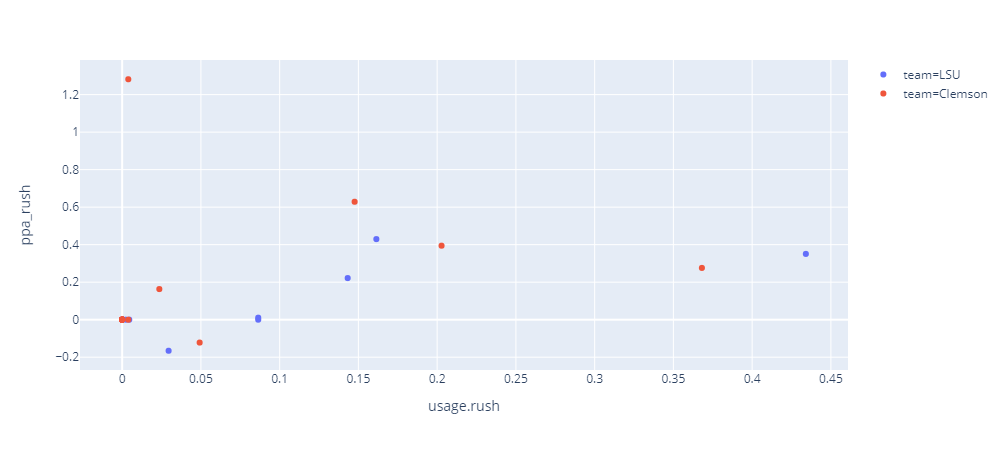

In [124]:
fig = px.scatter(players, x='usage.rush', y='ppa_rush', color='team', mark)
fig.show()

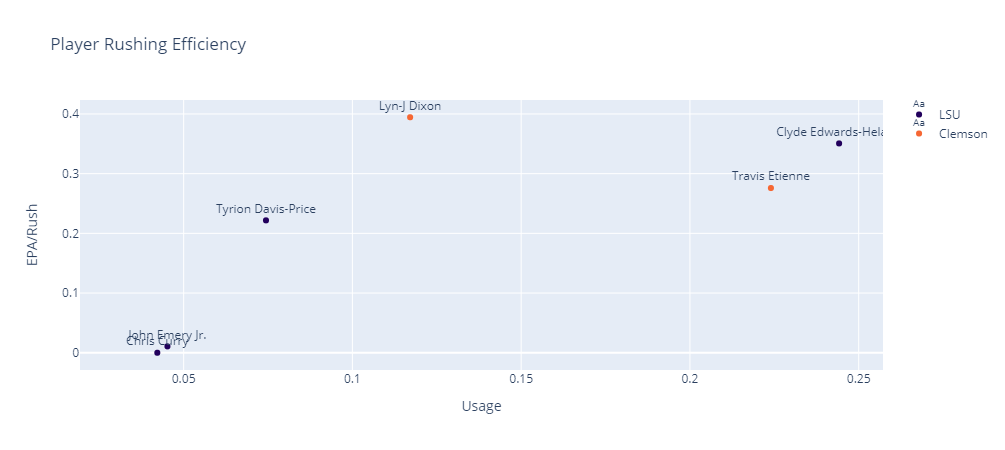

In [146]:
fig = go.Figure()

rushing = players[players['usage.rush'] > 0.05]
team1_players = rushing.query("team == '{0}' & position != 'QB'".format(home_team))
team2_players = rushing.query("team == '{0}' & position != 'QB'".format(away_team))

fig.add_trace(go.Scatter(
    x=team1_players['usage.overall'], y=team1_players['ppa_rush'], text=team1_players['name'], textposition='top center',
    name=home_team,
    mode='markers+text',
    marker_color=team1.color
))

fig.add_trace(go.Scatter(
    x=team2_players['usage.overall'], y=team2_players['ppa_rush'], text=team2_players['name'], textposition='top center',
    name=away_team,
    mode='markers+text',
    marker_color=team2.color
))

fig.update_layout(
    title="Player Rushing Efficiency",
    xaxis_title="Usage",
    yaxis_title="EPA/Rush"
)

fig.show()

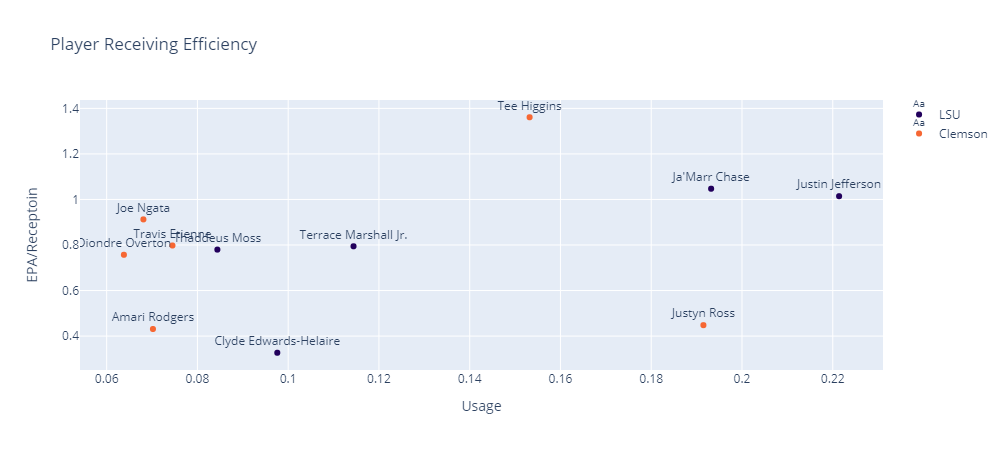

In [150]:
fig = go.Figure()

rushing = players[players['usage.pass'] > 0.05]
team1_players = rushing.query("team == '{0}' & position != 'QB'".format(home_team))
team2_players = rushing.query("team == '{0}' & position != 'QB'".format(away_team))

fig.add_trace(go.Scatter(
    x=team1_players['usage.pass'], y=team1_players['ppa_pass'], text=team1_players['name'], textposition='top center',
    name=home_team,
    mode='markers+text',
    marker_color=team1.color
))

fig.add_trace(go.Scatter(
    x=team2_players['usage.pass'], y=team2_players['ppa_pass'], text=team2_players['name'], team2_players='top center',
    name=away_team,
    mode='markers+text',
    marker_color=team2.color
))

fig.update_layout(
    title="Player Receiving Efficiency",
    xaxis_title="Usage",
    yaxis_title="EPA/Receptoin"
)

fig.show()